<a href="https://colab.research.google.com/github/sammmy047/miniproject/blob/main/Image_Classification(miniproject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bing-image-downloader


In [4]:
!mkdir images


mkdir: cannot create directory ‘images’: File exists


In [5]:
from bing_image_downloader import downloader
downloader.download("pretty rose",limit=50,output_dir='images',adult_filter_off=True)
downloader.download("ice cream cone",limit=50,output_dir='images',
                    adult_filter_off=True)


[%] Downloading Images to /content/images/pretty rose


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://d2ieorefj5ilau.cloudfront.net/uploads/production/001/100/535/medium/8BE710B4-448C-44ED-BFED-B1E188C70390.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/6a/10/5a/6a105ae189cb97ea0bca9b30e137fa6f.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://d2ieorefj5ilau.cloudfront.net/uploads/production/001/142/785/medium/AP_20True_20Rose_20Story_20red_20(6).jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://d2ieorefj5ilau.cloudfront.net/uploads/production/001/142/787/medium/AP_20True_20Rose_20Story_20red_20(7).jpeg
[%] File Downloaded !

[%] Downloading Image #5 from https://d2ieorefj5ilau.cloudfront.net/uploads/production/000/937/979/medium/535A9E5F-BF09-45E5-AA9F-858E8745D047.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://d2ieorefj5ilau.cloudfront.net/uploa

In [6]:
!pip install ipython-autotime
%load_ext autotime

time: 167 µs (started: 2021-06-26 16:47:21 +00:00)


In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['pretty rose','ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 15.1 s (started: 2021-06-26 16:47:25 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 6.37 ms (started: 2021-06-12 13:05:19 +00:00)


In [ ]:
len(flat_data[0])


67500

time: 3.76 ms (started: 2021-06-12 13:05:21 +00:00)


<BarContainer object of 2 artists>

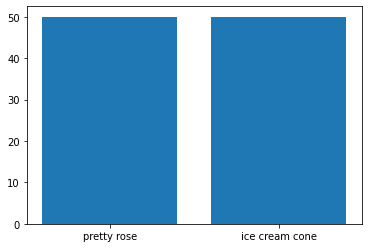

time: 128 ms (started: 2021-06-26 16:47:48 +00:00)


In [8]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)


time: 189 ms (started: 2021-06-26 16:47:54 +00:00)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 14s (started: 2021-06-26 16:47:56 +00:00)


In [11]:
y_pred = clf.predict(x_test)
y_pred


array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0])

time: 152 ms (started: 2021-06-26 16:49:15 +00:00)


In [ ]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

time: 3.63 ms (started: 2021-06-12 13:09:53 +00:00)


In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 767 µs (started: 2021-06-26 16:49:18 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 8,  5],
       [ 7, 12]])

time: 7.35 ms (started: 2021-06-12 13:10:44 +00:00)


In [14]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 28.6 ms (started: 2021-06-26 16:49:30 +00:00)


In [15]:
model = pickle.load(open('img_model.p','rb'))

time: 16.7 ms (started: 2021-06-26 16:49:34 +00:00)


Enter your URLhttps://image.shutterstock.com/image-photo/collection-empty-ice-cream-cone-260nw-756519802.jpg
(280, 580, 3)
 PREDICTED OUTPUT: ice cream cone


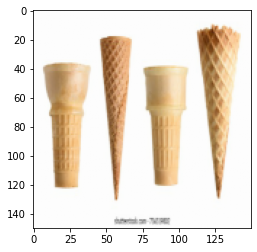

time: 7.46 s (started: 2021-06-26 16:49:39 +00:00)


In [16]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')